<a href="https://colab.research.google.com/github/snehilkumbhani/tensorflow/blob/main/neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2025-05-13 05:19:23.441234: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747113563.677510      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747113563.746188      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
from sklearn.datasets import make_circles
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
circles=pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


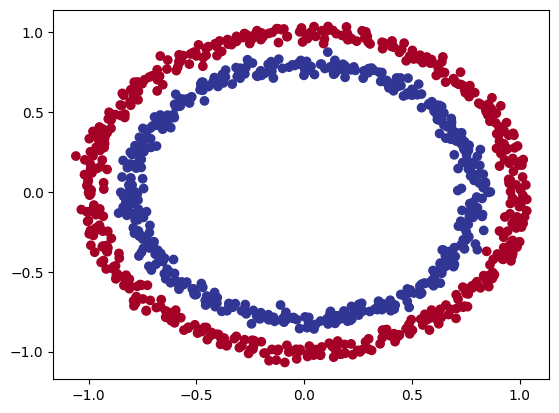

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);

In [ ]:
x.dtype

dtype('float64')

In [ ]:
x.shape,y.shape


((1000, 2), (1000,))

In [ ]:
x[19],y[19]

(array([-0.64210013, -0.74537441]), 0)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [ ]:
tf.random.set_seed(42)
model1=tf.keras.Sequential([
           tf.keras.Input(shape=(2,)),
           tf.keras.layers.Dense(5,activation="sigmoid"),
           tf.keras.layers.Dense(2,activation="sigmoid"),
           tf.keras.layers.Dense(2,activation="sigmoid"),
           tf.keras.layers.Dense(1,activation="sigmoid")
])

model1.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.3),
    loss='binary_crossentropy',
    metrics=["accuracy"]
)


I0000 00:00:1746259445.571974      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746259445.572684      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [ ]:
model1.fit(x_train, y_train, epochs=100)

Epoch 1/100


I0000 00:00:1746259448.143085      96 service.cc:148] XLA service 0x7efc140046a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746259448.144220      96 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746259448.144238      96 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746259448.378500      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/24 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6250 - loss: 0.6660

I0000 00:00:1746259449.180275      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5266 - loss: 0.6906
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5072 - loss: 0.6936 
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 0.6940 
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 0.6940 
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 0.6940 
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 0.6940 
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 0.6940 
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 0.6940 
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 0.6940 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 0.6940 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 0.6940 
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

In [ ]:
y_preds1=model1.predict(x_test)
y_preds1

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.4953757 ],
       [0.4948152 ],
       [0.49482104],
       [0.49492246],
       [0.49527842],
       [0.4949627 ],
       [0.49534398],
       [0.49527118],
       [0.49534136],
       [0.49484134],
       [0.49481988],
       [0.49529877],
       [0.49491444],
       [0.49532446],
       [0.49485928],
       [0.49502596],
       [0.49528158],
       [0.49497986],
       [0.49501526],
       [0.49536616],
       [0.4947793 ],
       [0.49477914],
       [0.4950582 ],
       [0.49526116],
       [0.4953127 ],
       [0.4952823 ],
       [0.4949141 ],
       [0.49534252],
       [0.49527147],
       [0.49481228],
       [0.494919  ],
       [0.4953074 ],
       [0.49523807],
       [0.49531552],
       [0.4950633 ],
       [0.49476236],
       [0.49529   ],
       [0.49481016],
       [0.4948627 ],
       [0.4953774 ],
       [0.49509263],
       [0.49477422],
       [0.49500453],
       [0.49537137],
       [0.49477795],
       [0.4953179 ],
       [0.49488276],
       [0.495

In [ ]:
loss, accuracy = model1.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.3f}, Test Accuracy: {accuracy:.3f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5147 - loss: 0.6929
Test Loss: 0.693, Test Accuracy: 0.504


In [ ]:
model1.fit(x_train, y_train, epochs=2000)

Epoch 1/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4933 - loss: 0.6939 
Epoch 2/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.6939 
Epoch 3/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.6939 
Epoch 4/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.6939 
Epoch 5/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.6939 
Epoch 6/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.6939 
Epoch 7/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.6939 
Epoch 8/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.6939 
Epoch 9/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.6939 
Epoch 10/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.6939 
Epoch 11/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4933 - loss: 0.6939 
Epoch 12/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
y_preds1=model1.predict(x_test)
y_preds1

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[1.3344772e-03],
       [9.9970311e-01],
       [9.9923432e-01],
       [9.9964488e-01],
       [8.1232446e-04],
       [1.8152047e-03],
       [1.2876214e-02],
       [4.9976871e-04],
       [2.4220310e-03],
       [5.3405314e-04],
       [9.9983156e-01],
       [2.8542892e-04],
       [4.2321207e-04],
       [4.6034492e-04],
       [7.2104484e-04],
       [9.9960917e-01],
       [3.4921878e-04],
       [3.4888170e-04],
       [8.3430525e-04],
       [8.6916442e-04],
       [7.4406317e-03],
       [1.8544155e-03],
       [9.9908626e-01],
       [9.9968696e-01],
       [9.9973673e-01],
       [9.9859351e-01],
       [5.6438468e-04],
       [2.6046863e-04],
       [9.9990857e-01],
       [2.7280173e-04],
       [9.9978966e-01],
       [1.3413829e-03],
       [1.3732080e-03],
       [9.9980682e-01],
       [9.9927169e-01],
       [5.2319735e-04],
       [3.8668574e-04],
       [9.9952602e-01],
       [9.9989676e-01],
       [1.1147715e-03],
       [7.9138903e-04],
       [1.711957

In [ ]:
loss, accuracy = model1.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.3f}, Test Accuracy: {accuracy:.3f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0023 
Test Loss: 0.004, Test Accuracy: 1.000


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38 (156.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
def plot_decision_boundary(model, x, y):
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                         np.linspace(y_min, y_max, 250))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

1954/1954 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
doing binary classification


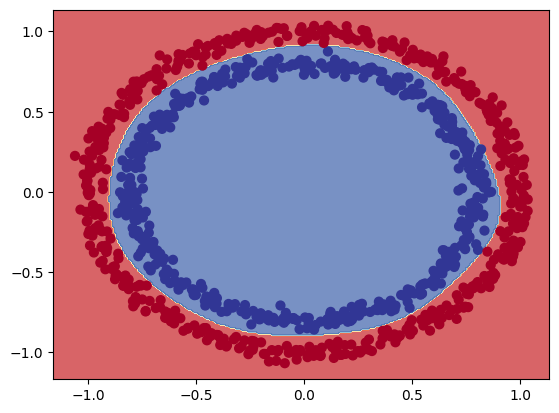

In [ ]:
plot_decision_boundary(model=model1,x=x,y=y)

In [ ]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([
           tf.keras.Input(shape=(2,)),
           tf.keras.layers.Dense(5,activation="relu"),
           tf.keras.layers.Dense(2,activation="relu"),
           tf.keras.layers.Dense(2,activation="relu"),
           tf.keras.layers.Dense(1,activation="sigmoid")
])

model2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.3),
    loss='binary_crossentropy',
    metrics=["accuracy"]
)


In [ ]:
model2.fit(x_train, y_train, epochs=100)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4990 - loss: 0.7004 
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4728 - loss: 0.6946 
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4939 - loss: 0.6940 
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [ ]:
model2.fit(x_train, y_train, epochs=2000)

Epoch 1/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 2/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 3/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 4/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 5/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 6/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 7/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 8/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 9/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 10/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 11/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4889 - loss: 0.6939 
Epoch 12/2000
24/24 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model2.summary()

In [ ]:
plot_decision_boundary(model=model2,x=x,y=y)

In [ ]:
a=tf.cast(tf.range(-10,10),tf.float32)
a

In [ ]:
plt.plot(a);

In [ ]:
def sigmoid(x):
    return 1/(1+tf.exp(-x))

In [ ]:
sigmoid(a)


In [ ]:
plt.plot(sigmoid(a))

In [ ]:
def relu(x):
    return tf.maximum(0,x)

In [ ]:
relu(a)

In [ ]:
plt.plot(relu(a))

In [ ]:
def tanh(x):
    return tf.tanh(x)

In [ ]:
tanh(a)

In [ ]:
plt.plot(tanh(a))

In [ ]:
x,y

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
               optimizer="Adam",
               metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 20)
)


model_9.fit(x_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100


I0000 00:00:1746333502.311220      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746333502.312086      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
I0000 00:00:1746333504.298148      94 service.cc:148] XLA service 0x7ef594006090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746333504.298726      94 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746333504.298757      94 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746333504.655183      94 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/24 ━━━━━━━━━━━━━━━━━━━━ 1:13 3s/step - accuracy: 0.4688 - loss: 0.7038

I0000 00:00:1746333505.611763      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5156 - loss: 0.7104 - learning_rate: 1.0000e-04
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - loss: 0.7101 - learning_rate: 1.1220e-04
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - loss: 0.7096 - learning_rate: 1.2589e-04
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - loss: 0.7092 - learning_rate: 1.4125e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - loss: 0.7087 - learning_rate: 1.5849e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - loss: 0.7082 - learning_rate: 1.7783e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - loss: 0.7077 - learning_rate: 1.9953e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - loss: 0.7071 - learning_rate: 2.2387e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - loss: 0.7065 - learning_rate: 2.511

In [ ]:
tf.round(y_preds)

<tf.Tensor: shape=(250, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
 

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds=model_9.predict(x_test)
confusion_matrix(y_test,tf.round(y_preds))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[132,   0],
       [118,   0]])

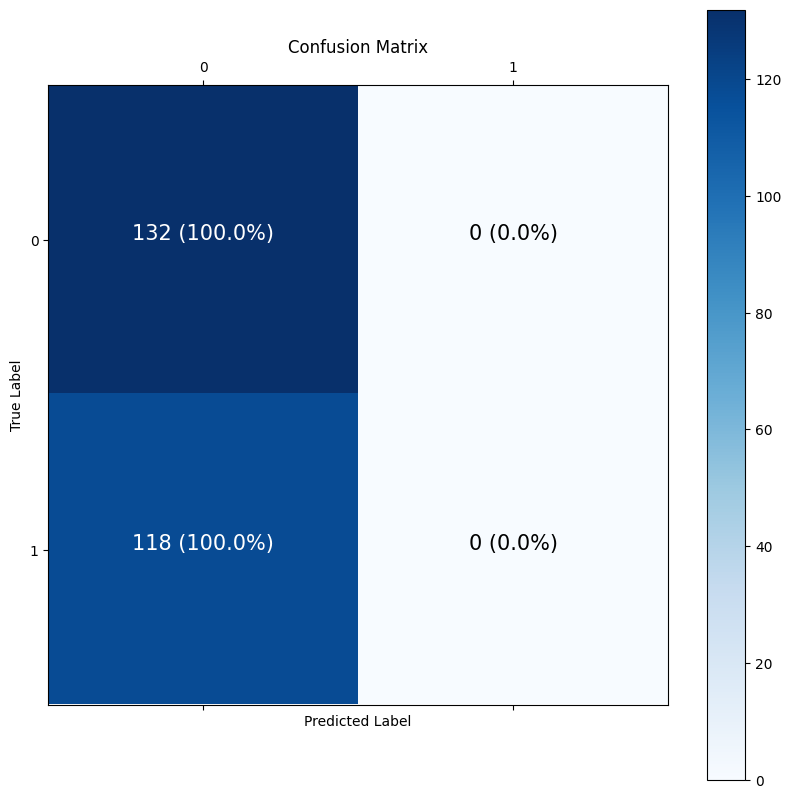

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Compute confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Plotting
figsize = (10, 10)
fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Labels
classes = False
if classes:
    labels = classes
else:
    labels = np.arange(n_classes)

# Axis setup
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Annotate cells
threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

plt.show()
